<a href="https://colab.research.google.com/github/maciekpojedynski/Geron/blob/main/02_chapter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

#Wczytywanie danych z csv do pandas
data = pd.read_csv('/content/housing.csv')



Sprawdzanie brakujących wartości, typów kolumn oraz rozmiaru

In [3]:
#Sprawdzanie typów kolumn
print(data.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [4]:
#Sprawdzanie brakujacych wartosci
print(data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
#Sprawdzenie kategorii w kolumnie ocean_proximity
data['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [7]:
#Podsumowanie atrybutów numerycznych
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


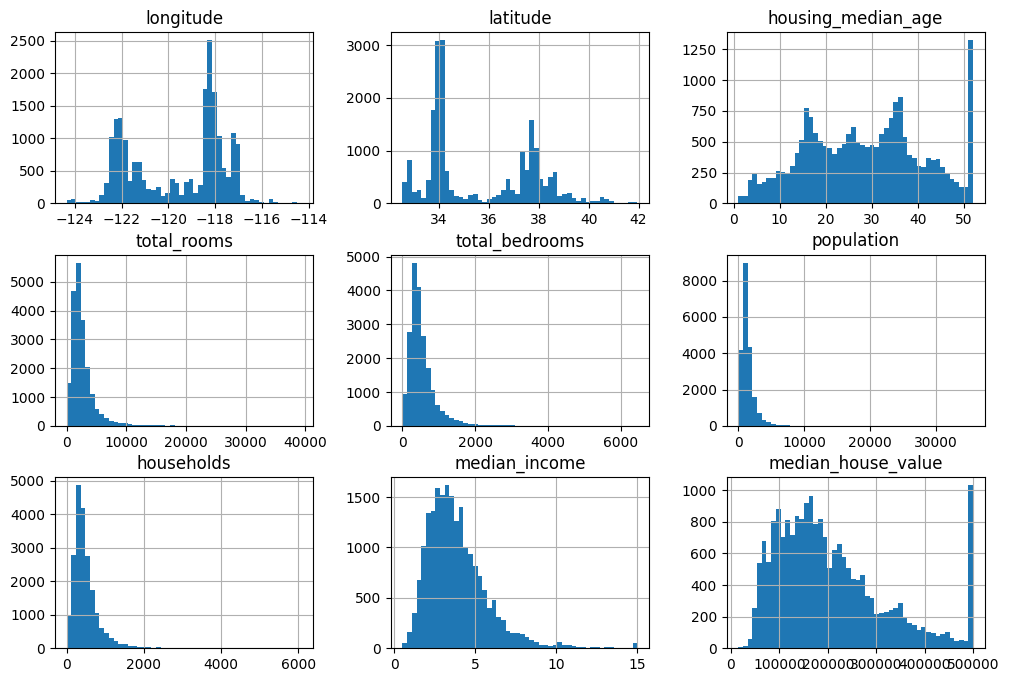

In [8]:
#Generuje wykresy dla atrybutów numerycznych
import matplotlib.pyplot as plt

data.hist(bins = 50, figsize = (12, 8))
plt.show()

Dzielenie zbioru na treningowy oraz testowy przy pomocy biblioteki scikit-learn

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np

train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 42)

In [10]:
#Dodanie kolumny, która kategoryzuje według mediany dochodu
data['income_cat'] = pd.cut(data['median_income'],
                            bins = [0.,1.5,3.0,4.5,6.,np.inf],
                            labels = [1,2,3,4,5])


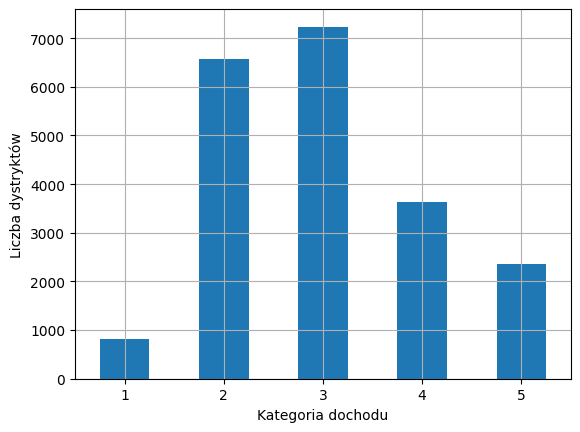

In [11]:
#Reprezentacja nowej kolumny
data['income_cat'].value_counts().sort_index().plot.bar(rot = 0, grid = True)
plt.xlabel('Kategoria dochodu')
plt.ylabel('Liczba dystryktów')
plt.show()
#kontynuacja jutro

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
'''Dzielenie zbioru na treningowy oraz testowy przy pomocy biblioteki scikit-learn'''
splitter = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 42)
strat_splits = []
''' Przygotowywanie zbioru według data['income_cat], żeby w rozdzielonych próbkach był taki sam jak w pierwotnych wzorze'''
for train_index, test_index in splitter.split(data, data['income_cat']):
  #.iloc umożliwia wyszukiwanie wartosci po indeksach
  strat_train_set = data.iloc[train_index]
  strat_test_set = data.iloc[test_index]

In [33]:
#Druga opcja dzielenia z uwzglednieniem warstwowienia po income_cat
strat_train_set, strat_test_set = train_test_split(
    data, test_size = 0.2, random_state = 42, stratify = data['income_cat']
)

KeyError: 'income_cat'

In [16]:
#Sprawdzenie czy warstwowienie dziala
strat_test_set['income_cat'].value_counts() / len(strat_test_set)
'''Porównanie wartości z wykresem'''

'Porównanie wartości z wykresem'

In [18]:
''' Po przygotowaniu zbioru testowego, mozna usunac kolumne '''
for set_ in (strat_train_set, strat_test_set):
  set_.drop('income_cat', axis = 1, inplace = True)

KeyError: "['income_cat'] not found in axis"

In [19]:
''' Etap eksperymentowania z danymi treningowymi, warto zrobic kopie, do której wrócimy na koniec'''
data = strat_train_set.copy()

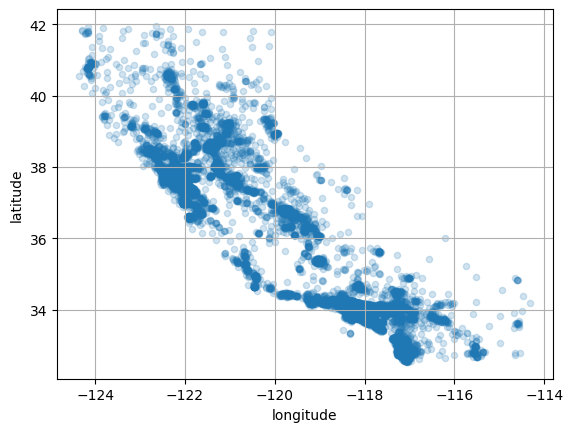

In [22]:
#Wizualizacja danych geograficznych
data.plot(x = 'longitude', y = 'latitude', kind = 'scatter', grid = True, alpha = 0.2)
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

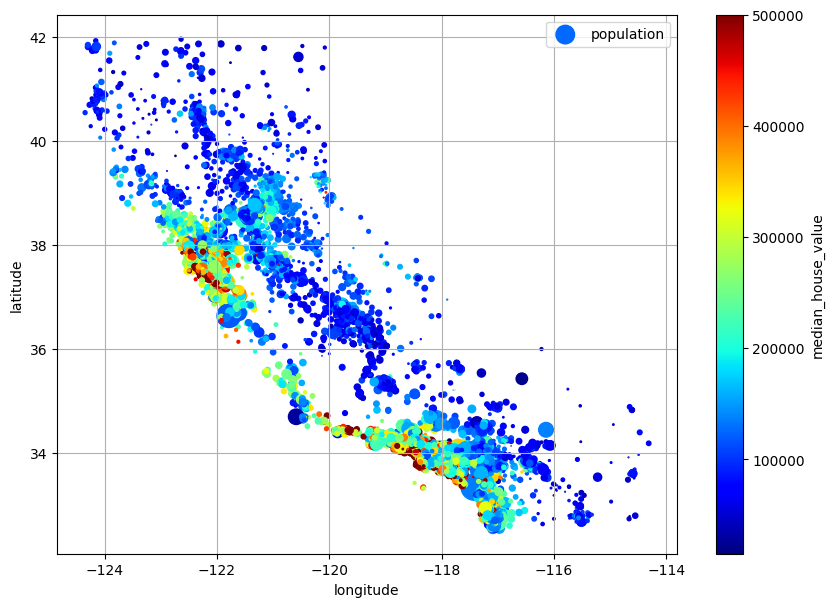

In [24]:
''' Dodanie wielkości kółek zależnych od populacji oraz kolorów zależnych od ceny '''
data.plot(x = 'longitude', y = 'latitude', kind = 'scatter', grid = True, s = data['population'] / 100, label = 'population', c = 'median_house_value',
          cmap = 'jet', colorbar = True, legend = True, sharex = False, figsize = (10,7))


Korelacja pearsona
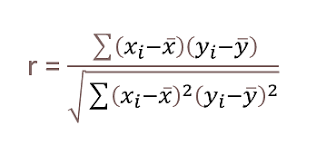

In [28]:
corr_matrix = data.corr(numeric_only=True)

In [29]:
corr_matrix['median_house_value'].sort_values(ascending = False)
'''W korelacji Pearsona, wartośći mogą osiągąć od <-1 do 1>, Im bliżej 1 to korelacja silnie dodatnia,
w przeciwnym wypadku silnie ujemna'''


,median_house_value
median_house_value,1.000000
median_income,0.687712
total_rooms,0.133425
housing_median_age,0.108522
households,0.064558
total_bedrooms,0.047418
population,-0.026121
longitude,-0.046916
latitude,-0.144870


Graficzne sprawdzenie korelacji najlepszych kolumn (top 4)

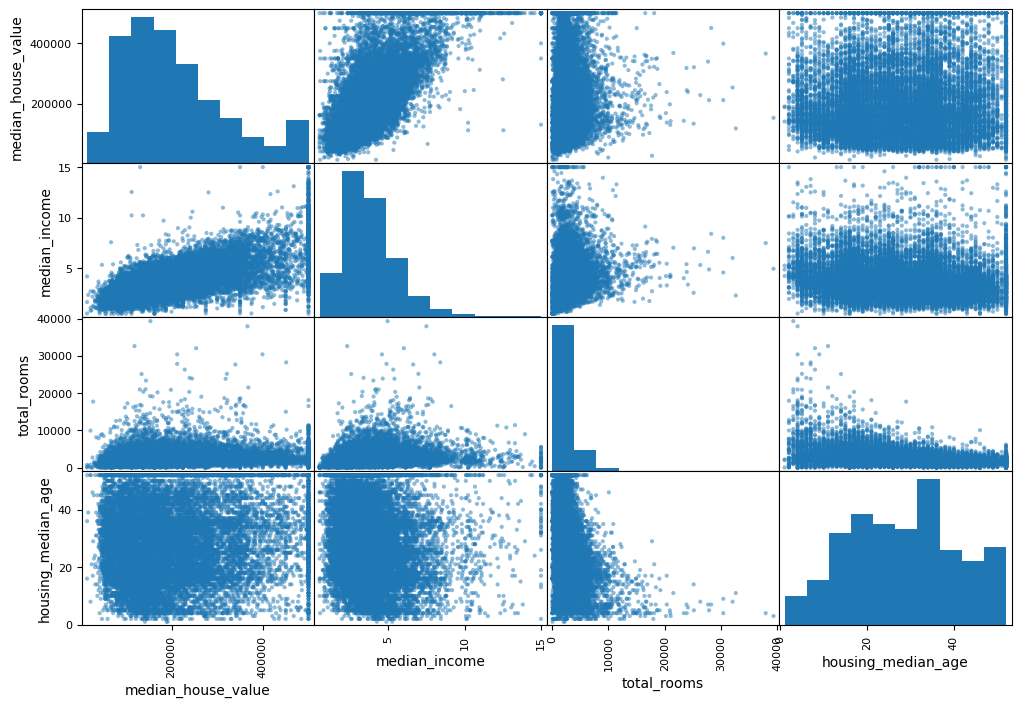

In [30]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
pd.plotting.scatter_matrix(data[attributes], figsize = (12,8))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

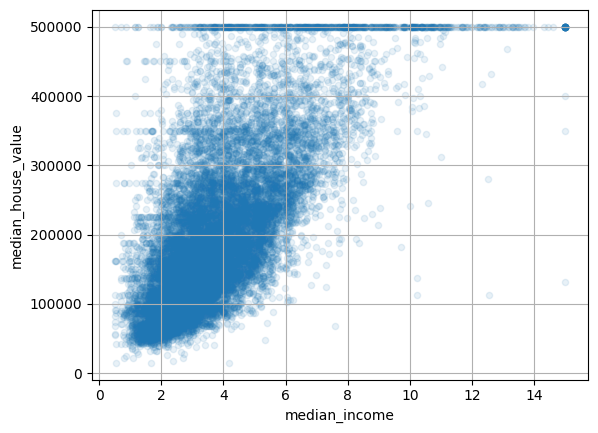

In [31]:
data.plot(x = 'median_income', y = 'median_house_value', kind = 'scatter', alpha = 0.1, grid = True)

In [32]:
#Eksperymentowanie ciag dalszy
data['pokoje_na_rodzine'] = data['total_rooms'] / data['households']
data['wspolczynnik_sypialni'] = data['total_bedrooms'] / data['total_rooms']
data['wspolczynnik_populacji'] = data['population'] / data['households']

corr_matrix = data.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending = False)

,median_house_value
median_house_value,1.000000
median_income,0.687712
pokoje_na_rodzine,0.145243
total_rooms,0.133425
housing_median_age,0.108522
households,0.064558
total_bedrooms,0.047418
wspolczynnik_populacji,-0.024887
population,-0.026121
longitude,-0.046916


Pojawiła się korelacja ujemna przy współczynniku_sypialnianym, oznacza to, że
wraz z mniejsza iloscia sypialni, cena domu idzie do góry

**Preparing data for ML algorithms**

In [35]:
X_train = strat_train_set.drop('median_house_value', axis = 1)
y_train = strat_train_set['median_house_value'].copy()

**Data Cleaning**

In [36]:
median = data['total_bedrooms'].median()
data['total_bedrooms'].fillna(median, inplace = True)

/tmp/ipython-input-36-224786926.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_bedrooms'].fillna(median, inplace = True)


In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
'''SimpleImputer działa jedynie na wartościach numerycznych,
dlatego trzeba stworzyć kopie zbioru danych bez kolumny ocean_proximity'''
data_num = data.select_dtypes(include = [np.number])
imputer.fit(data_num)

SimpleImputer(strategy='median')

In [41]:
imputer.statistics_


array([-118.48  ,   34.25  ,   29.    , 2143.    ,  436.    , 1169.    ,
        411.    ,    3.5293])

In [42]:
data_num.median().values

array([-118.48  ,   34.25  ,   29.    , 2143.    ,  436.    , 1169.    ,
        411.    ,    3.5293])

In [43]:
X = imputer.transform(data_num)

Sprawdzanie nazw kolumn, na których był fitowany imputer

In [44]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

Przywrocenie nazw, bo imputer zwraca numpy lub sympy bez kolumn nazw

In [ ]:
data_tr = pd.DataFrame(X, columns=data_num.columns,
                          index=data_num.index)

**Obsługa tekstu i atrybutów kategorialnych**

In [45]:
data_cat = data[['ocean_proximity']]
data_cat.head()

,ocean_proximity
19712,INLAND
7414,<1H OCEAN
3110,INLAND
20210,NEAR OCEAN
4766,<1H OCEAN


In [47]:
''' Przerobienie tekstu na liczbe '''

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)
data_cat_encoded[:8]

array([[1.],
       [0.],
       [1.],
       [4.],
       [0.],
       [0.],
       [0.],
       [3.]])

In [48]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

W tym przypadku lepiej uzyc OneHotEncoder

In [50]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
